<a href="https://colab.research.google.com/github/Shrutij3/Machine_Learning_Project/blob/main/Predict_Client_will_subscribe_to_a_term_Deposit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predict_if_a_client_will_Subscribe_to_a_term_Deposit**

---





*   The goal is to predict whether a client will subscribe to a term deposit (yes/no) based on their information.
*   This is a binary classification problem.






# 1. Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

# 2. Import Dataset

In [3]:
df = pd.read_csv('/content/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.shape

(11162, 17)

# 3. Data Preprocessing

## progmatically assessment
* 1.sample
* 2.info---> null vaule check
* 3.duplicated
* 4.describe
* 5.head and tail

In [ ]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

,0
job,12
marital,3
education,4
default,2
housing,2
loan,2
contact,3
month,12
poutcome,4
deposit,2


In [ ]:
df.isnull().count()

,0
age,11162
job,11162
marital,11162
education,11162
default,11162
balance,11162
housing,11162
loan,11162
contact,11162
day,11162


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [ ]:
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [ ]:
df['education'].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [ ]:
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11152,34,housemaid,married,secondary,no,390,yes,no,cellular,15,jul,659,3,-1,0,unknown,no
11153,43,admin.,single,secondary,no,35,no,no,telephone,9,nov,208,1,-1,0,unknown,no
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no
11155,35,blue-collar,married,secondary,no,80,yes,yes,cellular,21,nov,38,2,172,2,failure,no
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,jul,273,5,-1,0,unknown,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


# 4. Exploratory Data Analysis
it is approche to analyzing  dataset to sumarize their main characteristics. often with visual method.

## Steps :

* 1. Lable Assinging to column .
* 2. Univariate analysis
* 3. Bivariate analysis
* 4. Multivariate analysis
* 5. Feature engineering.---> outliers
  detect,missing value    detect...

# Feature/column description
* Age - Age of the customer - Numerical value
* job - Job of the customer - Categorical value
* marital - Marital status of the customer- Categorical value
*  education - eduction status - categorical value
* default - whether the custome is defaulter or not - categorical value
* balance - yearly account balance of the customer - continueous value
* housing - housing status of the customer - categorical value
* loan - whether the customer availed any loans - categorical value
* contact - how many times the customer has been contacted - categorical value
* day - day from last contact - discrete value
* month - month from last contacted date - categorical value.
* duration - duration of last contact in hours - contineous value
* campaign - contact with how many campaign - categorical value

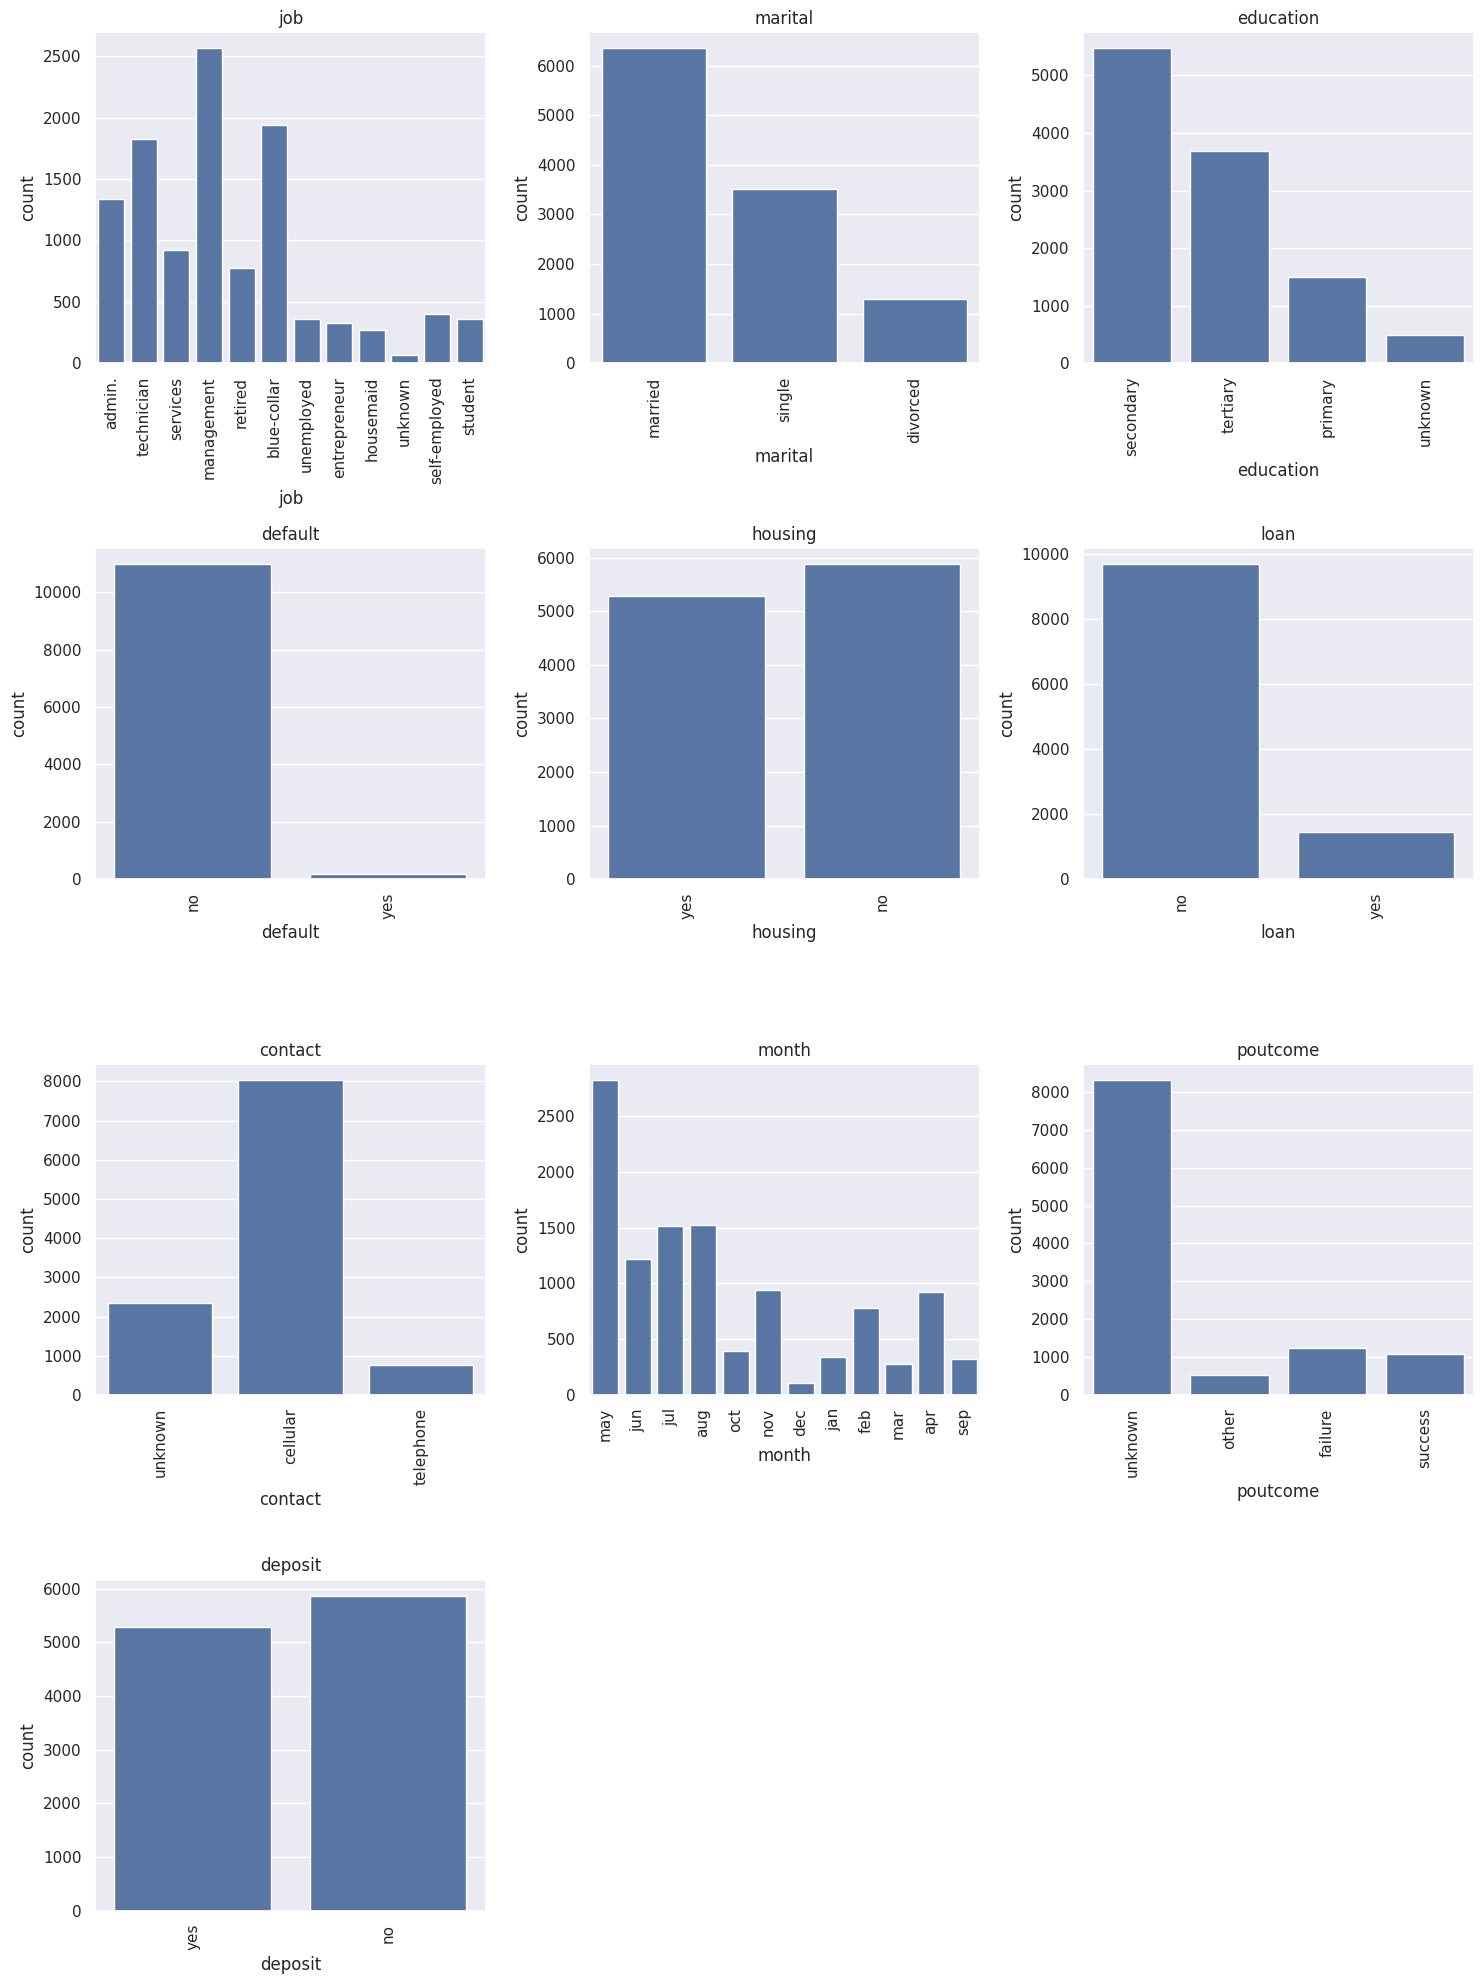

In [ ]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_var = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_var)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot categorical variable using Seaborn
for i, var in enumerate(cat_var):
    top_values = df[var].value_counts().nlargest(12).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

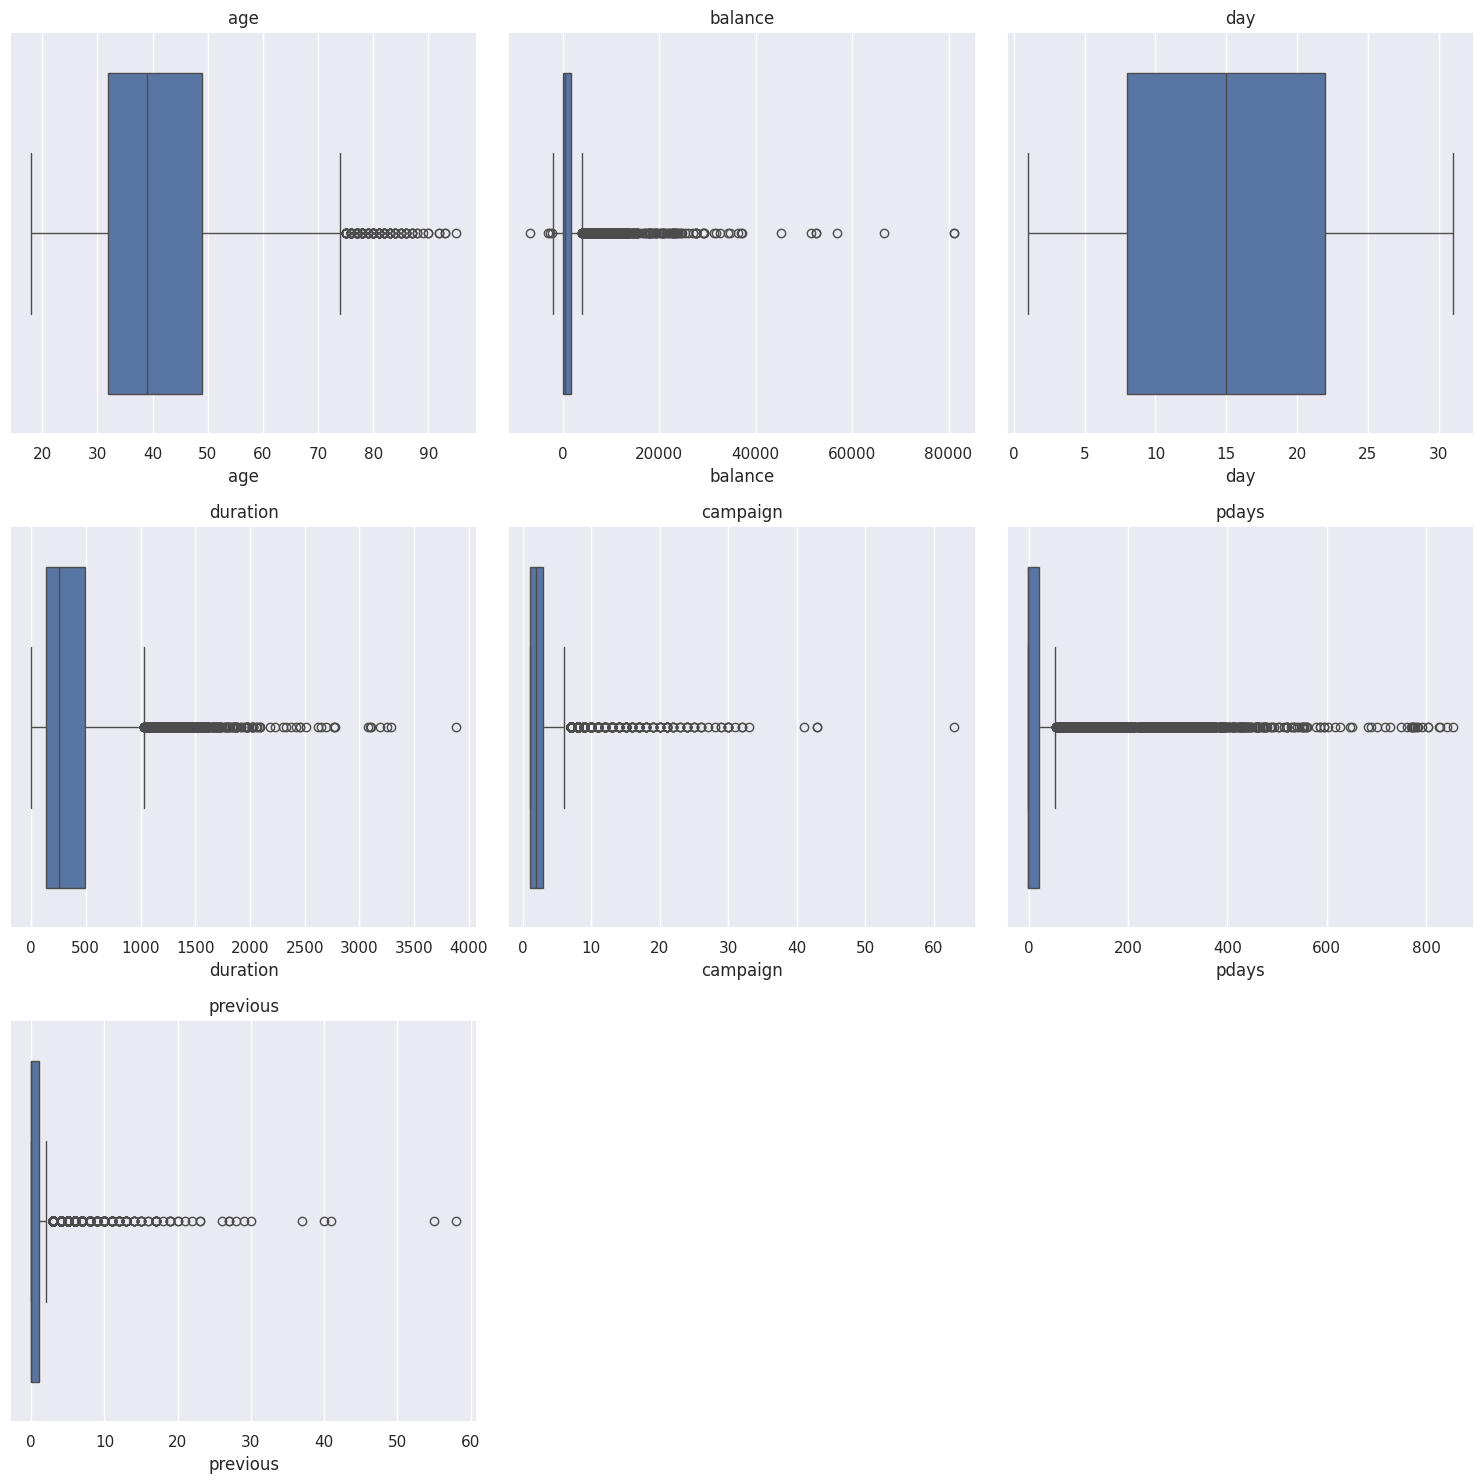

In [ ]:
# Get the names of all columns with data type 'int' or 'float'(numerical value)
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

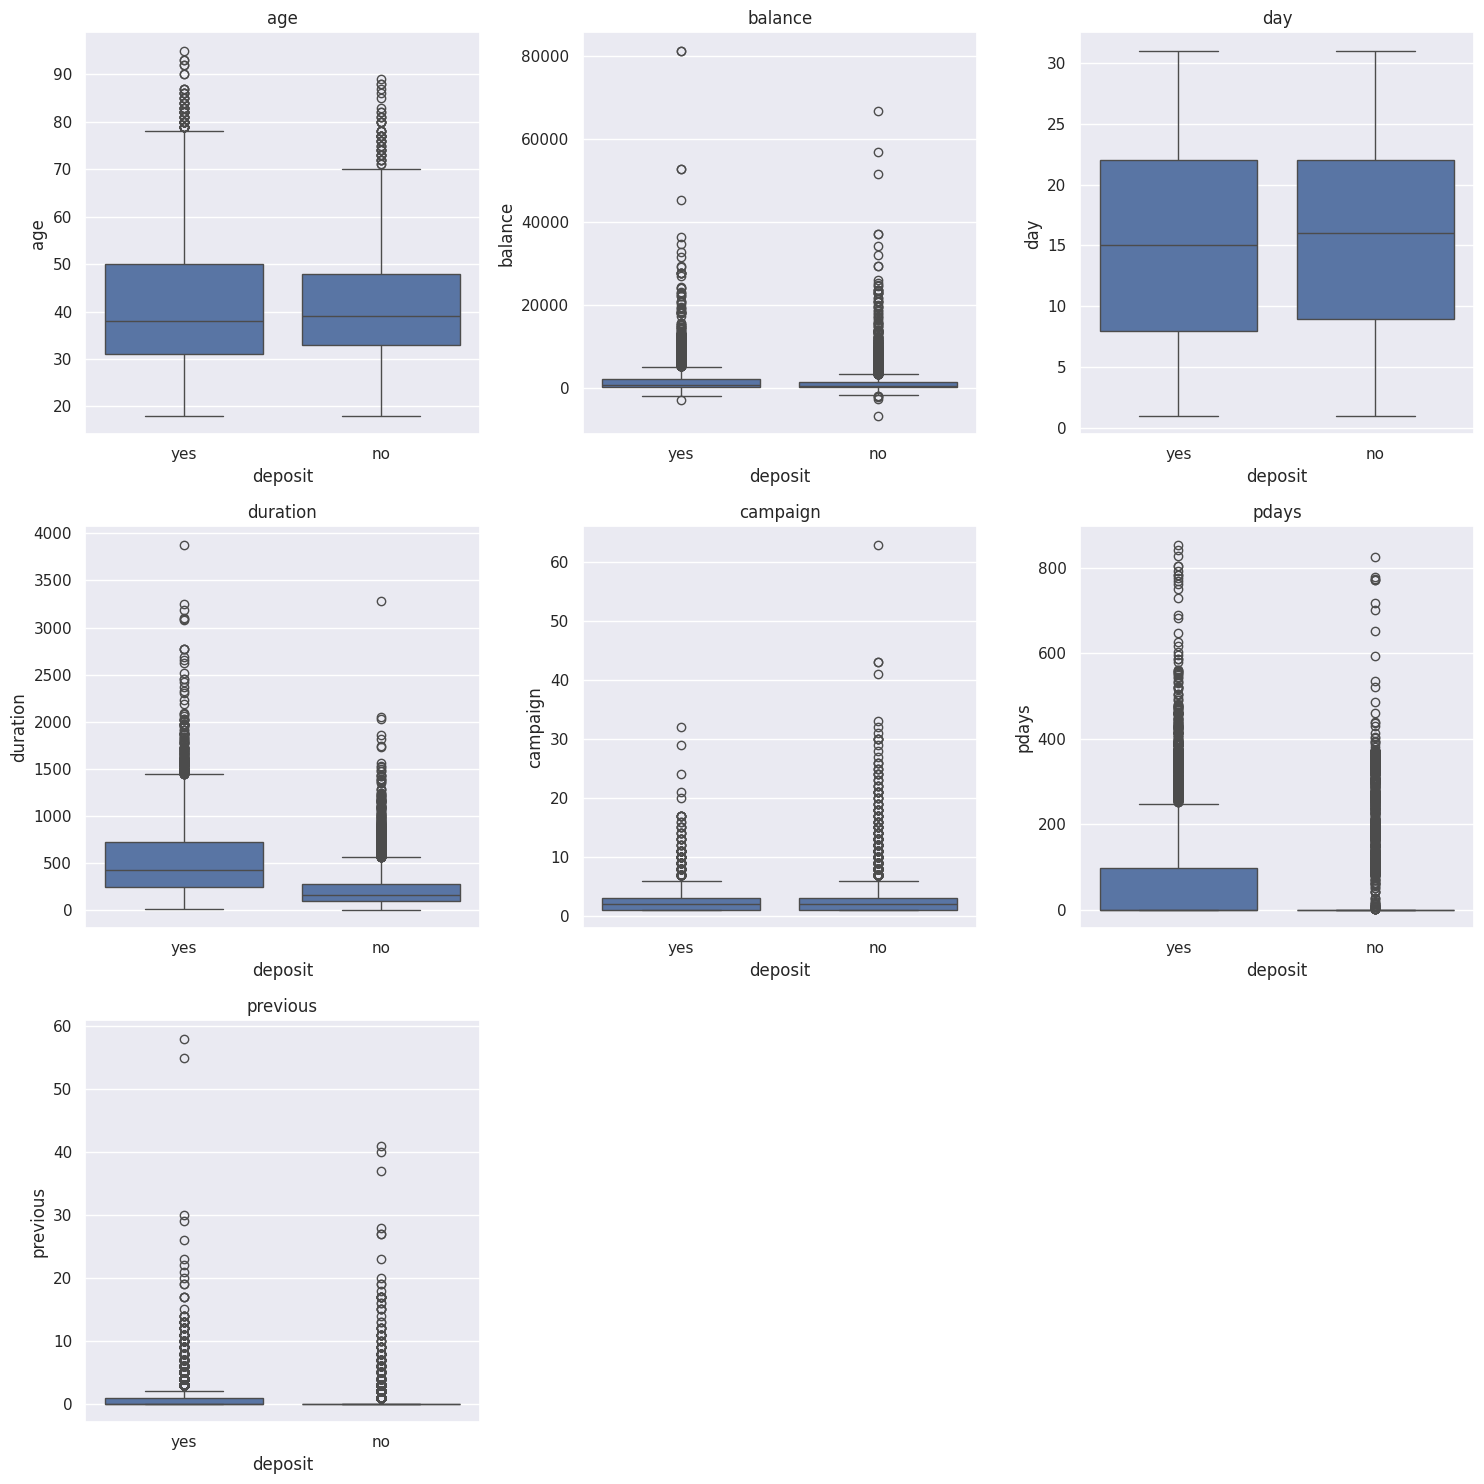

In [ ]:
# Create a box plot for each integer variable, with a hue based on the 'deposit' column.
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable, with a hue (categorical split) based on the 'deposit' column.
for i, var in enumerate(int_vars):
    sns.boxplot(y=var, x='deposit', data=df, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

#distribution of balance for customer with deposite

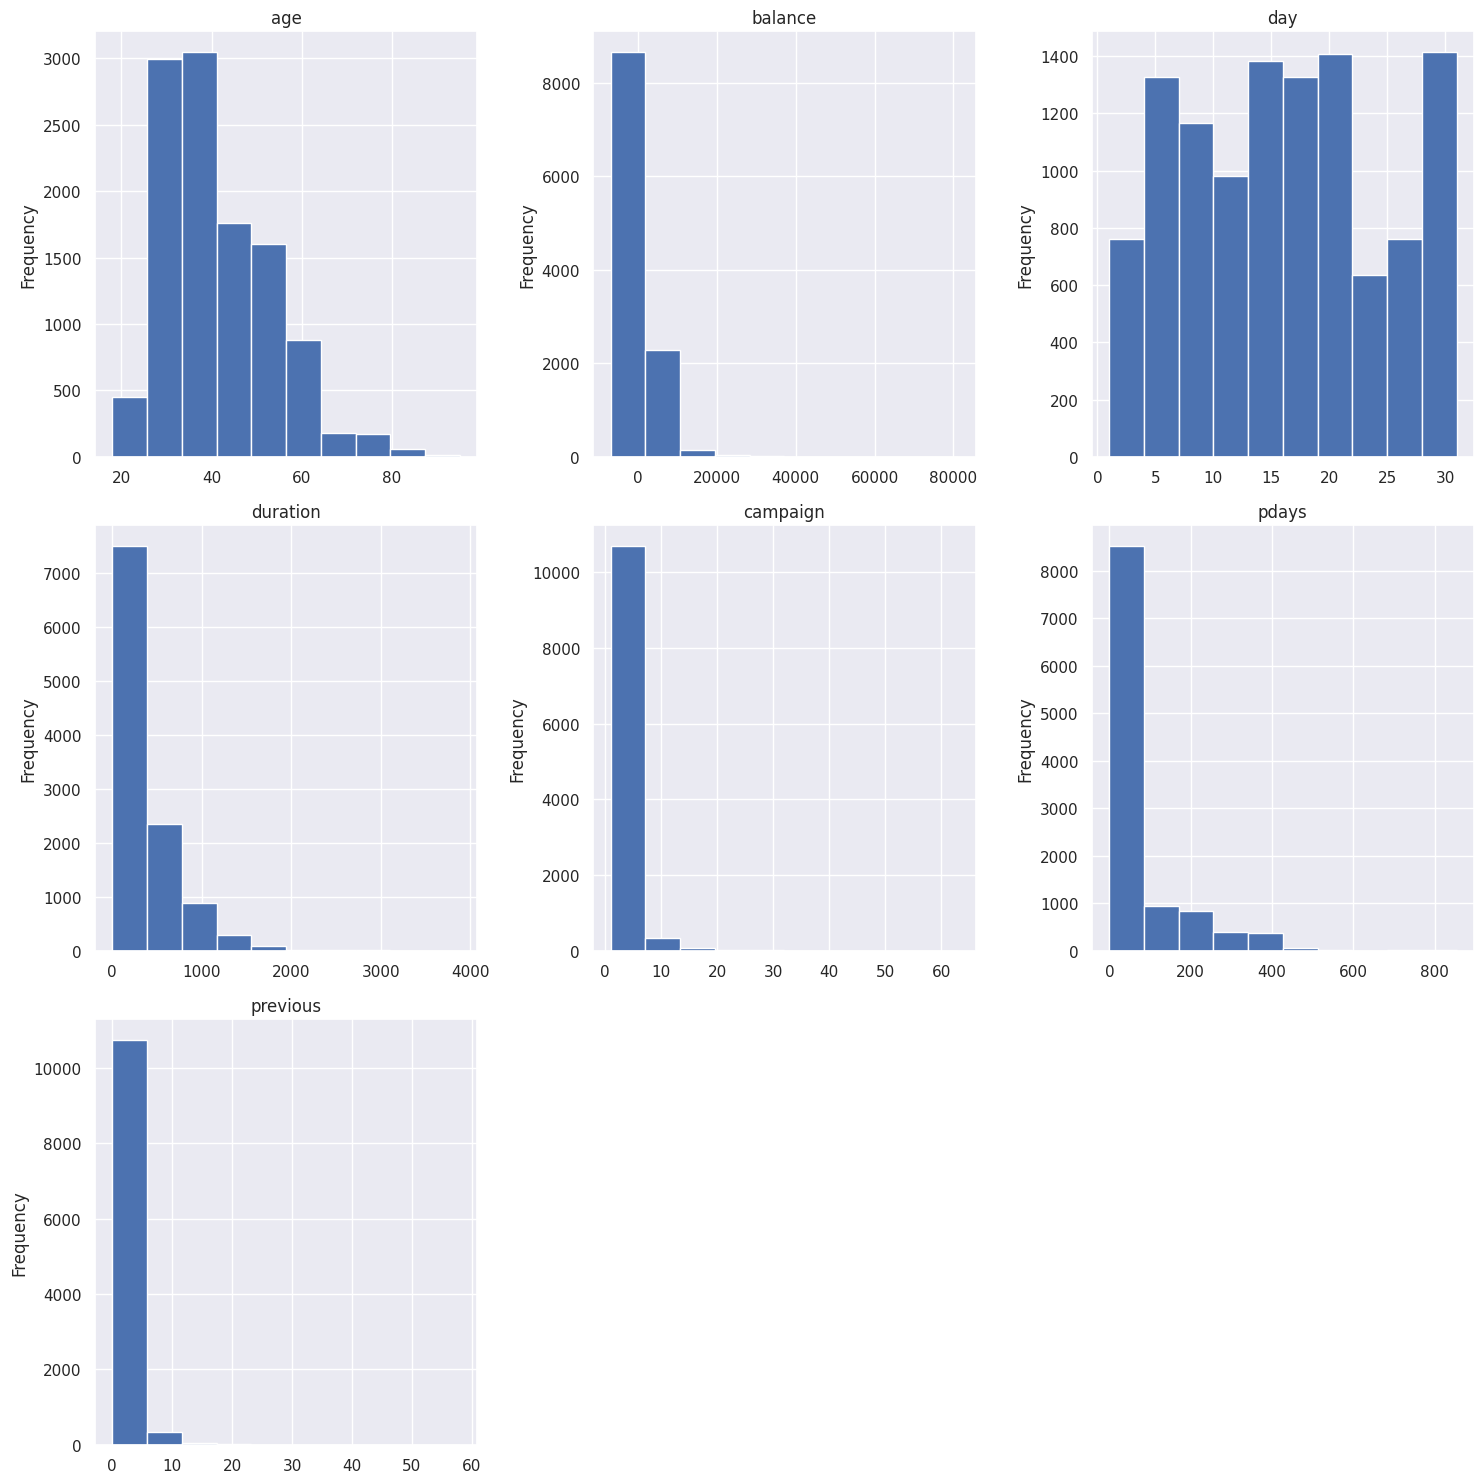

In [ ]:
# histograms for each numerical variable in the DataFrame
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable
for i, var in enumerate(int_vars):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

# The histogram shows the frequency distribution

<ipython-input-5-f07a21646f01>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-5-f07a21646f01>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-5-f07a21646f01>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-5-f07a21646f01>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-5-f07a21646f01>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-5-f07a21646f01>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xtickla

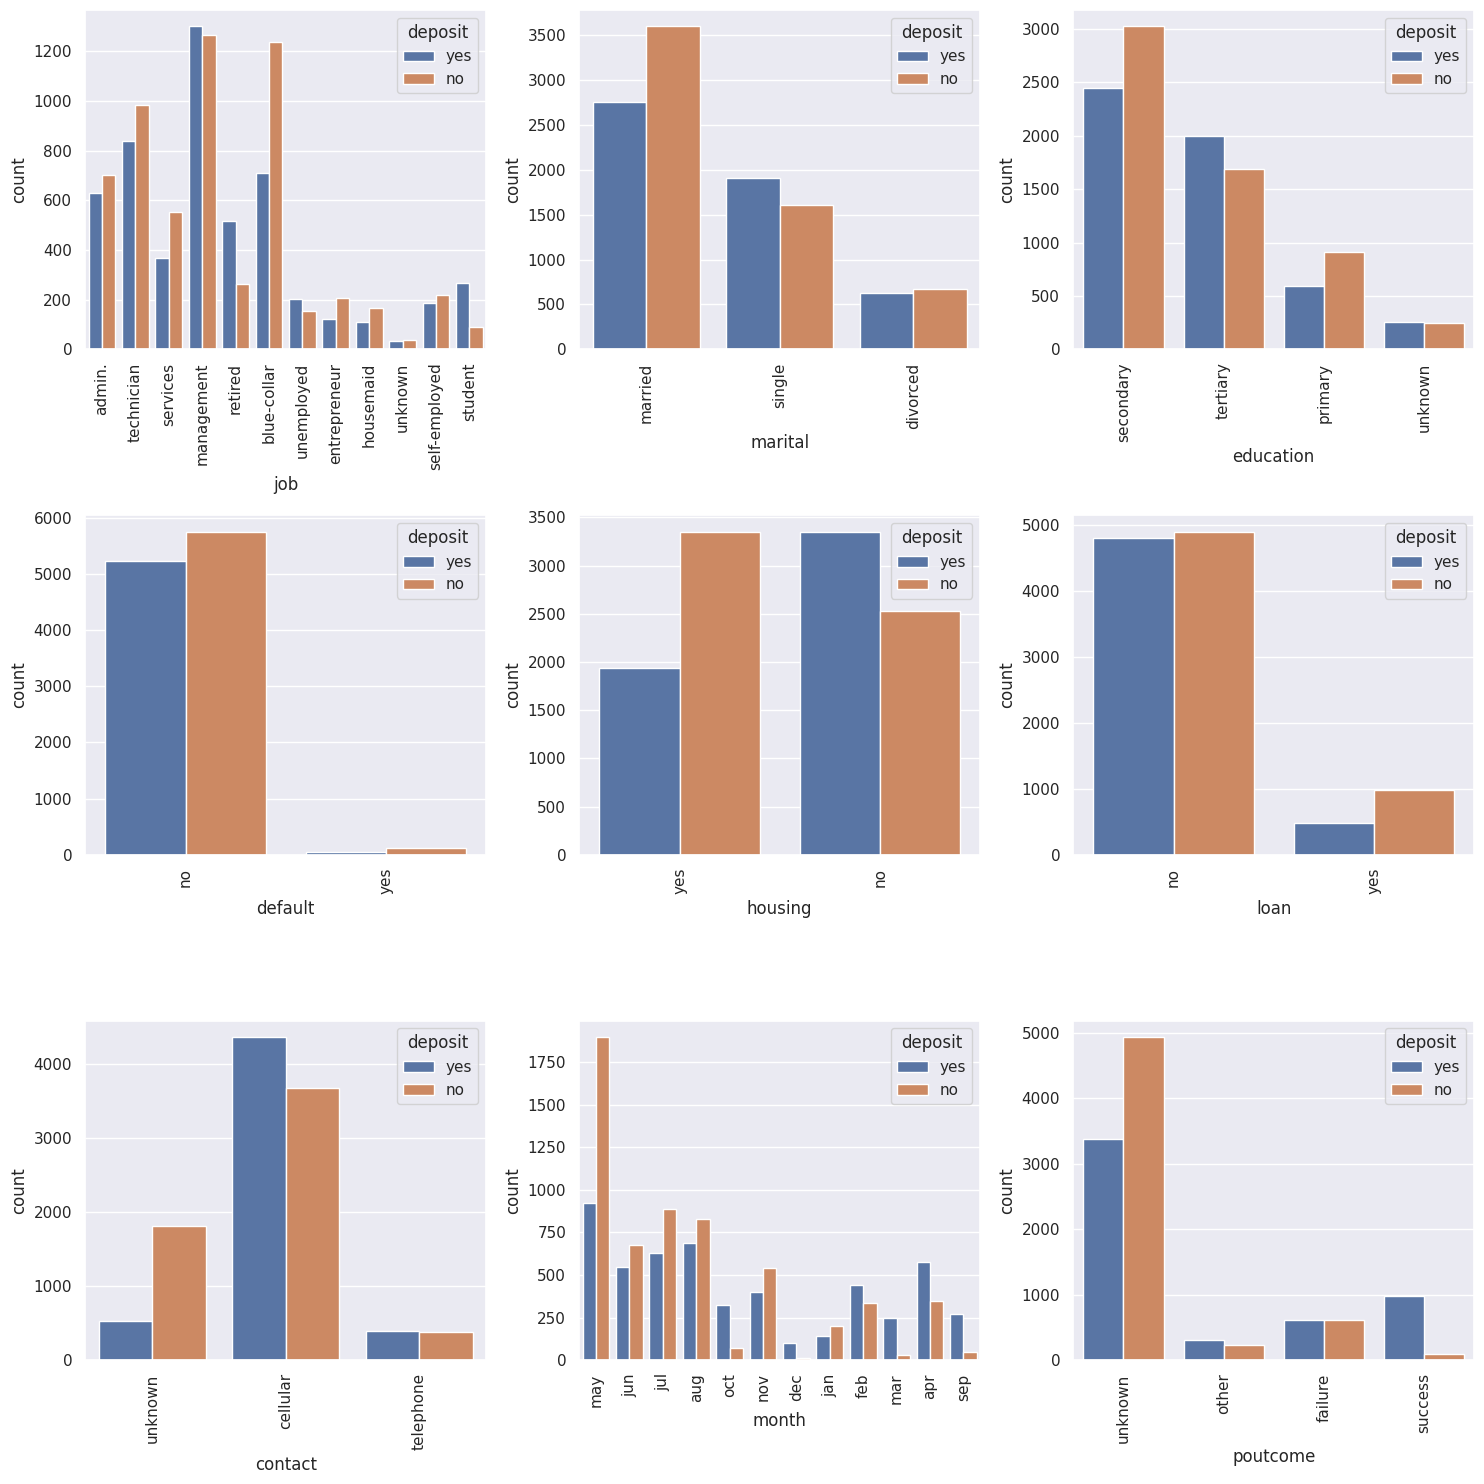

In [5]:
# list of categorical variables to plot
cat_vars = ['job', 'marital', 'education', 'default',
            'housing', 'loan', 'contact', 'month', 'poutcome']

# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='deposit', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

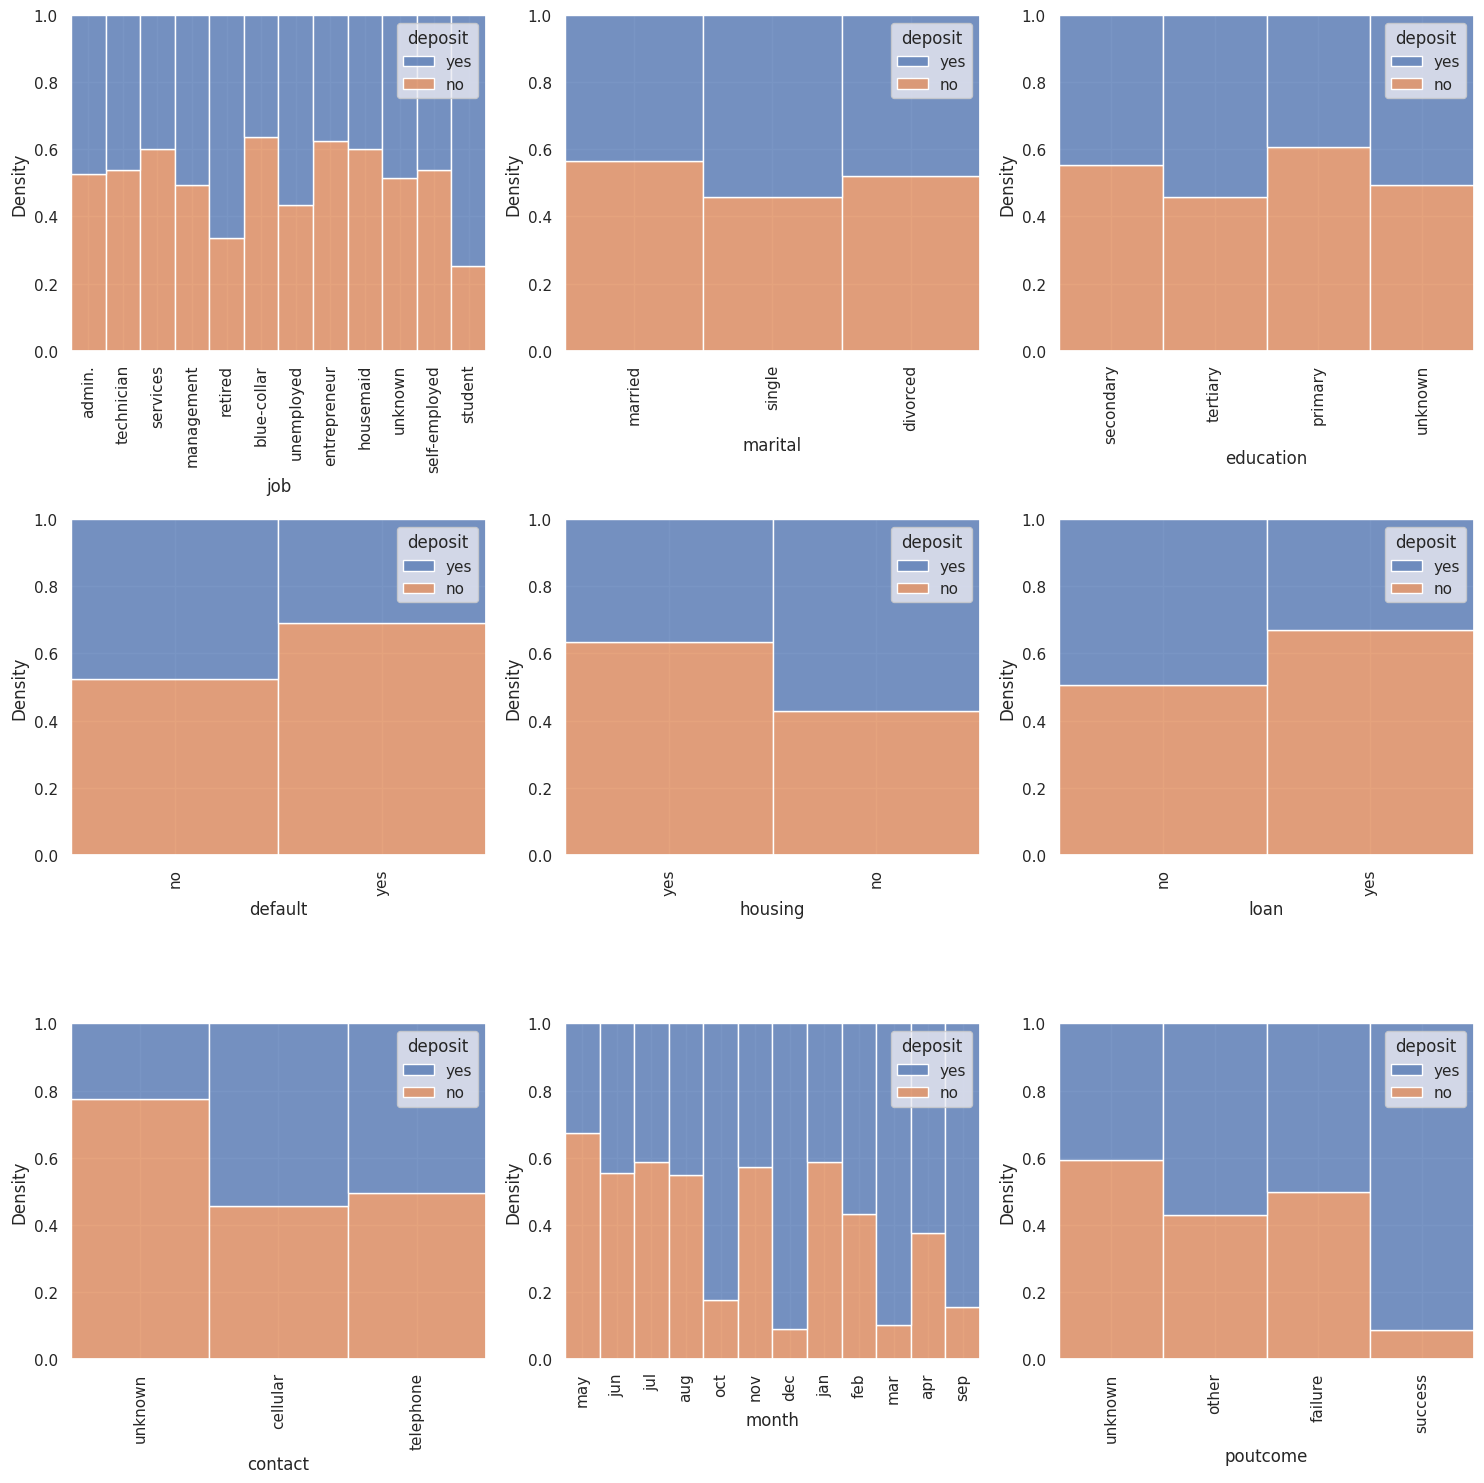

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# get list of categorical variables
cat_var = ['job', 'marital', 'education', 'default',
            'housing', 'loan', 'contact', 'month', 'poutcome']

# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(cat_var):
    sns.histplot(x=var, hue='deposit', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

In [ ]:
# Drop null value because the amount of null value is very small
df.dropna(inplace=True)

In [ ]:
# Check the amounnt of missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

,0


In [ ]:
df.shape

(11162, 17)

# Label Encoding for Object Datatypes

In [ ]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

job: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital: ['married' 'single' 'divorced']
education: ['secondary' 'tertiary' 'primary' 'unknown']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'other' 'failure' 'success']
deposit: ['yes' 'no']


In [ ]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder() #which is used to convert categorical values into numeric labels.

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

job: [ 0  9  7  4  5  1 10  2  3 11  6  8]
marital: [1 2 0]
education: [1 2 0 3]
default: [0 1]
housing: [1 0]
loan: [0 1]
contact: [2 0 1]
month: [ 8  6  5  1 10  9  2  4  3  7  0 11]
poutcome: [3 1 0 2]
deposit: [1 0]


<Axes: >

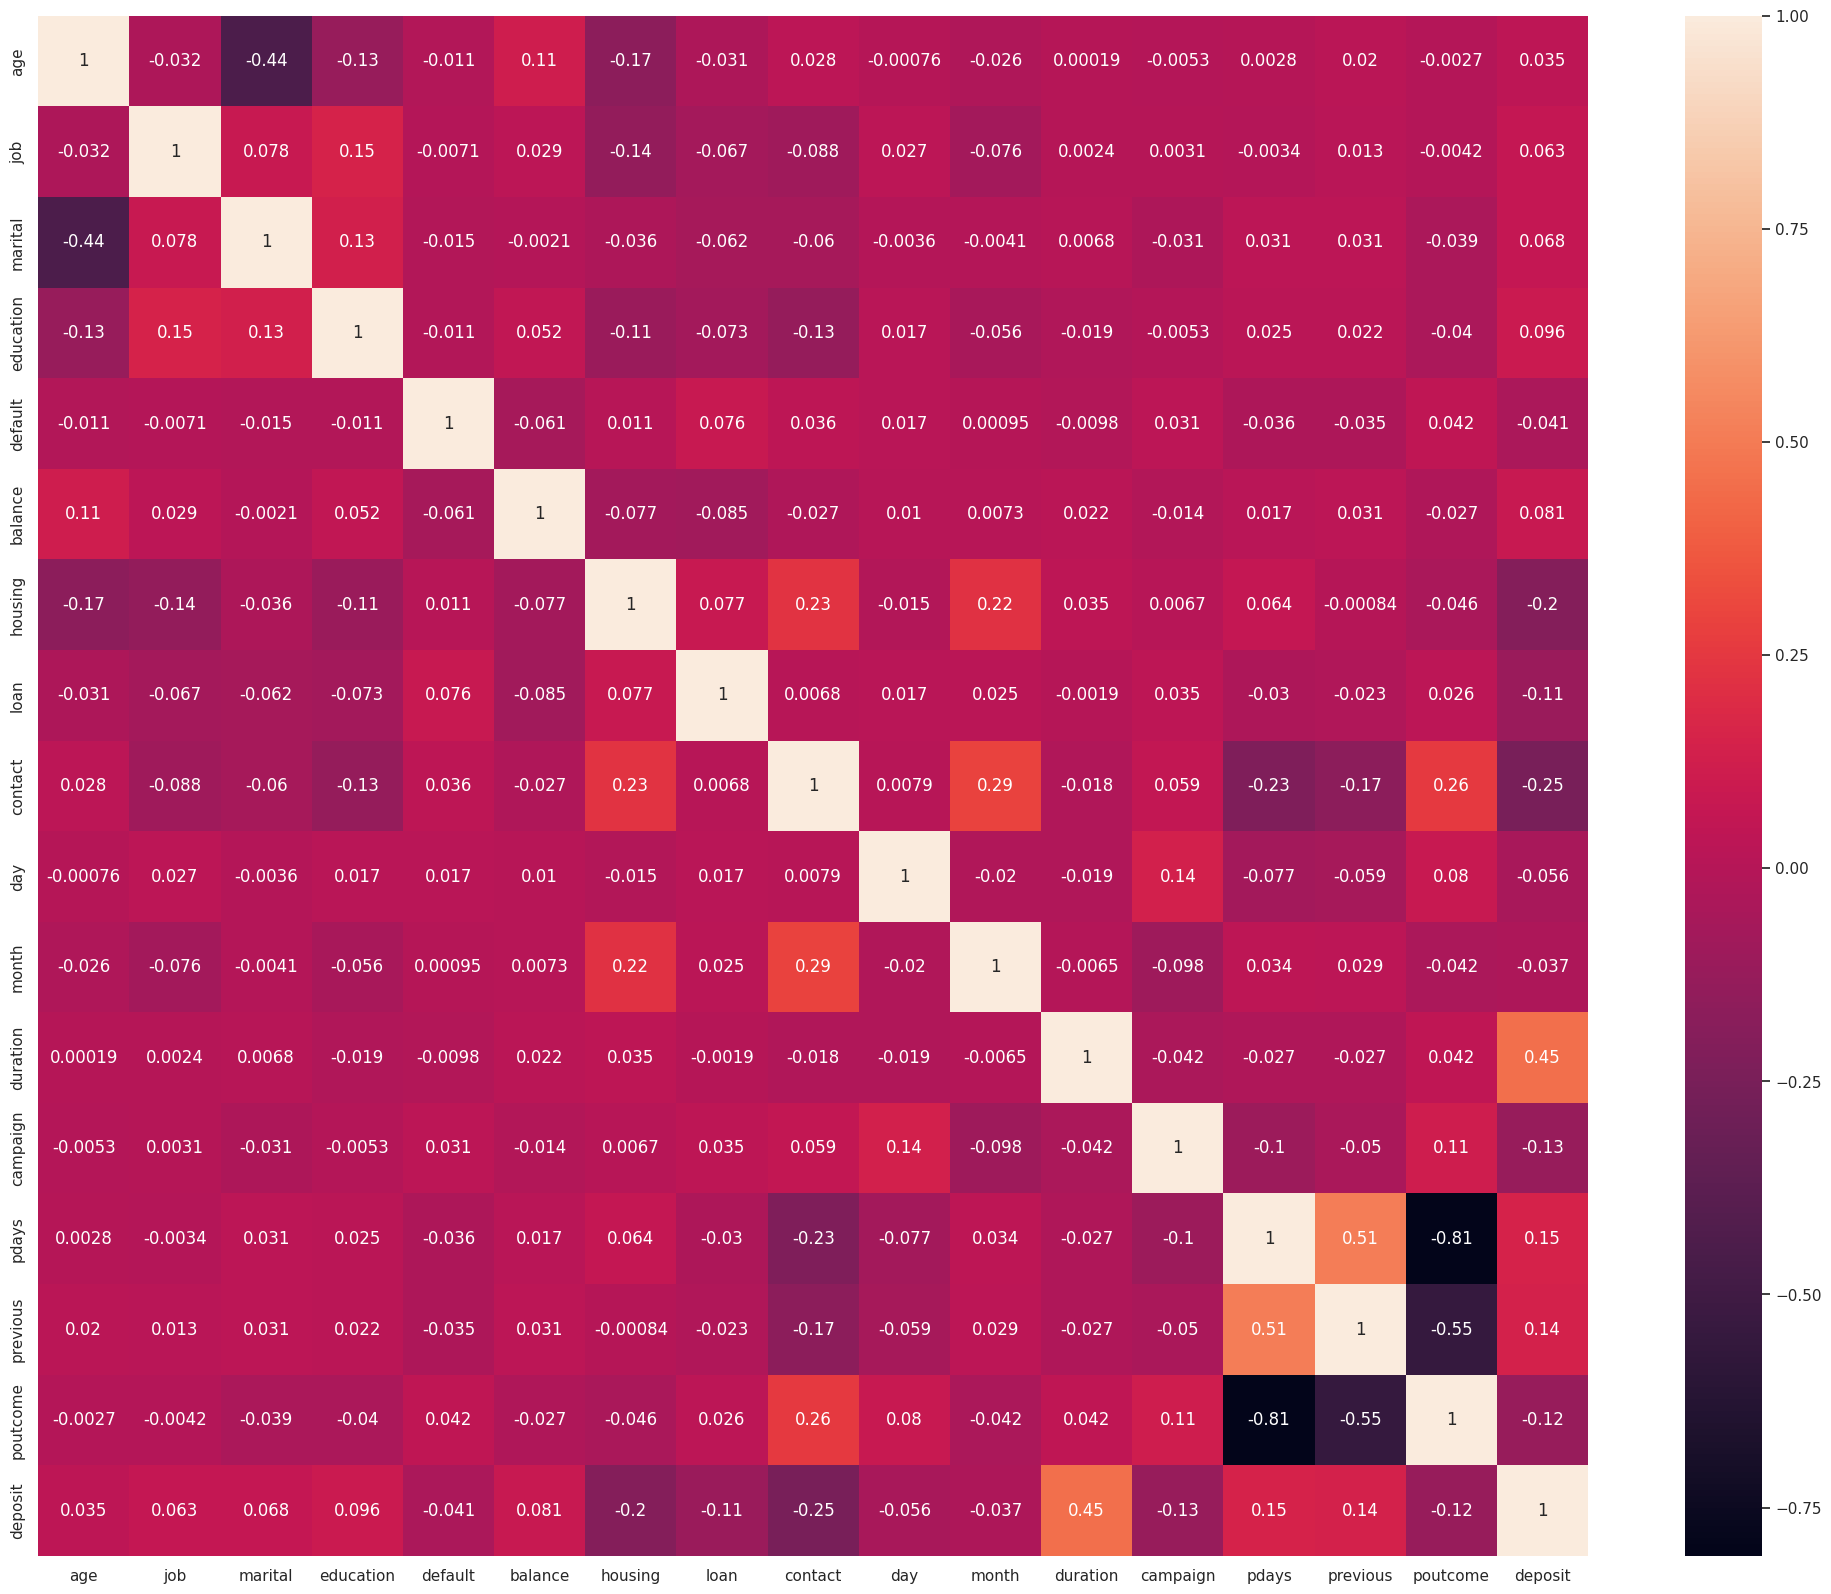

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

# Train Test Split

In [ ]:
X = df.drop('deposit', axis=1)
y = df['deposit'] # target variable which we predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=23)

# X_train and y_train are the features and target variables for the training set.
# X_test and y_test are the features and target variables for the testing set.
# 20% for testing and 80% for training

In [ ]:
display(X_train)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
2190,27,4,2,2,0,1840,0,0,0,1,6,220,1,28,8,1
1430,21,8,2,0,0,423,0,0,0,8,0,104,5,-1,0,3
10626,35,9,1,2,0,22,0,0,0,11,1,109,1,-1,0,3
2246,43,1,1,0,0,3917,0,0,0,3,6,725,2,93,1,2
8121,32,7,0,2,0,376,1,0,2,20,8,102,2,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6175,30,4,2,2,0,3773,1,0,2,27,8,99,1,-1,0,3
9704,36,9,1,1,0,3,0,0,0,20,1,100,4,-1,0,3
10185,41,0,2,1,0,2002,1,0,0,15,8,172,2,350,1,0
9256,47,9,0,2,0,694,1,0,0,11,8,1001,4,-1,0,3


In [ ]:
y_train.value_counts()

,count
deposit,
0,4704
1,4225


# Remove Outlier from Train Data using Z-Score

In [ ]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['age', 'balance', 'duration',
                    'campaign', 'pdays', 'previous']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# Decision Tree Classifier

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# apply model --> Decision Tree
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)



DecisionTreeClassifier()

# Hyperparameter Tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)


{'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 0}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=7, min_samples_leaf=2, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=2,
                       random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 82.04 %


* F-1 Score is the harmonic mean of precision and recall. average='micro' calculates metrics globally by counting the total true positives, false negatives, and false positives.
* Precision measures the proportion of true positive results in all positive predictions. average='micro' calculates metrics globally.
* Recall measures the proportion of true positives in all actual positives. average='micro' calculates metrics globally.
* Log Loss measures the performance of a classification model where probabilities are provided. It’s more suitable for probabilistic classifiers rather than direct class predictions.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8204209583519928
Precision Score :  0.8204209583519928
Recall Score :  0.8204209583519928
Log Loss :  6.472684733110603


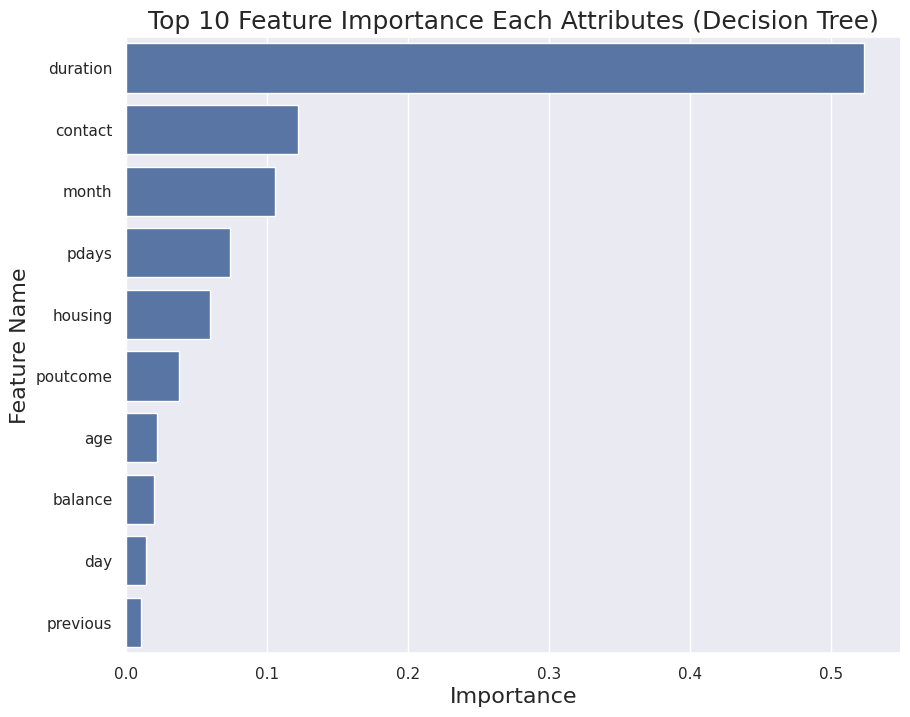

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_  #Importance scores
})
f_imp = imp_df.sort_values(by="Importance", ascending=False)

fi2 = f_imp.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.8204209583519928')

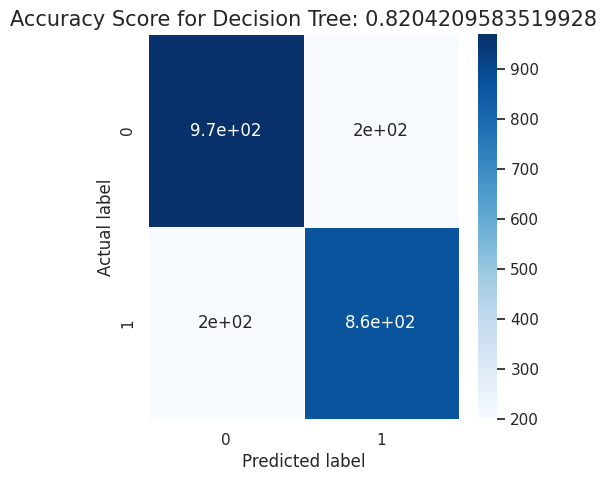

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

# computes the confusion matrix by comparing the true labels (y_test) with the predicted labels (y_pred)

# Summery
* True Positives (Top-left cell): 970 instances were correctly predicted as label 0.
* True Negatives (Bottom-right cell): 860 instances were correctly predicted as label 1.
* False Positives (Top-right cell): 200 instances were incorrectly predicted as label 1 when the actual label was 0.
* False Negatives (Bottom-left cell): 200 instances were incorrectly predicted as label 0 when the actual label was 1.

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 42}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, max_depth=None, max_features='sqrt', n_estimators=200, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [ ]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 85.89 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8589341692789969
Precision Score :  0.8589341692789969
Recall Score :  0.8589341692789969
Log Loss :  5.084527907555712


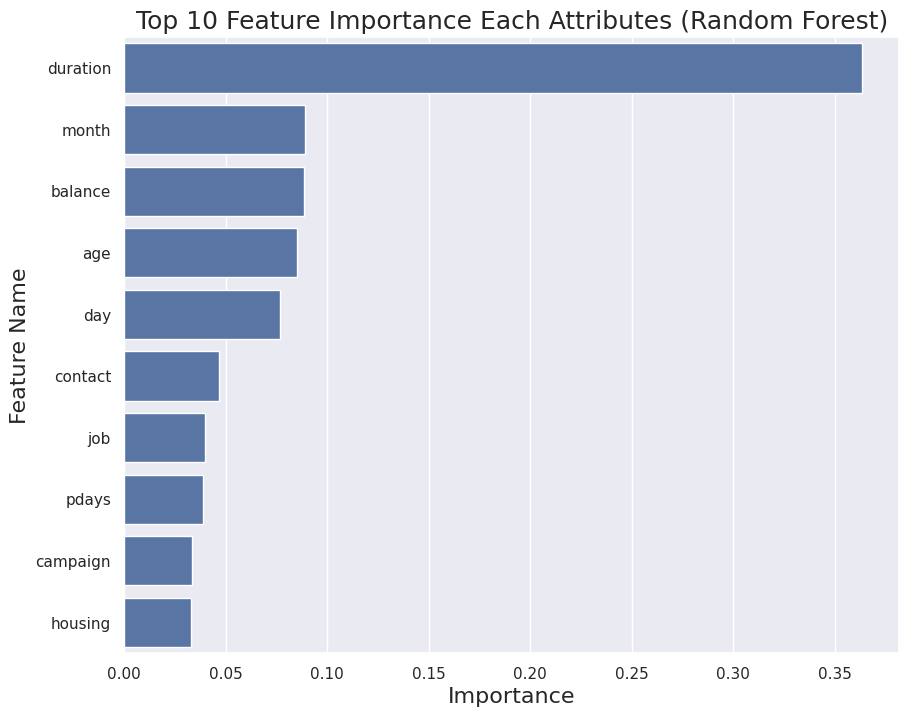

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.8589341692789969')

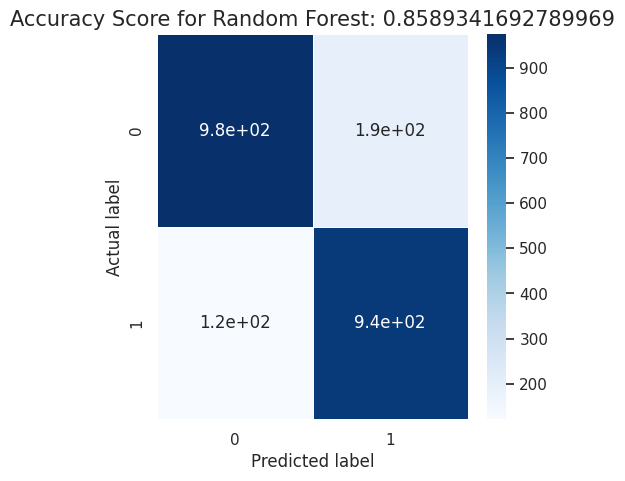

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

## Summary
* Accuracy Score for Random Forest is higher than Accuracy Score for Decision Tree

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/bank.csv')

# Mapping categorical variables to numerical values
data['job'] = data['job'].map({'management': 0, 'technician': 1, 'entrepreneur': 2, 'blue-collar': 3, 'unknown': 4,
                               'admin.': 5, 'services': 6, 'retired': 7, 'self-employed': 8, 'unemployed': 9,
                               'housemaid': 10, 'student': 11})
data['marital'] = data['marital'].map({'married': 0, 'single': 1, 'divorced': 2})
data['education'] = data['education'].map({'tertiary': 0, 'secondary': 1, 'unknown': 2, 'primary': 3})
data['default'] = data['default'].map({'no': 0, 'yes': 1})
data['housing'] = data['housing'].map({'yes': 0, 'no': 1})
data['loan'] = data['loan'].map({'no': 0, 'yes': 1})
data['contact'] = data['contact'].map({'unknown': 0, 'cellular': 1, 'telephone': 2})
data['month'] = data['month'].map({'may': 0, 'jun': 1, 'jul': 2, 'aug': 3, 'oct': 4, 'nov': 5, 'dec': 6,
                                   'jan': 7, 'feb': 8, 'mar': 9, 'apr': 10, 'sep': 11})
data['poutcome'] = data['poutcome'].map({'unknown': 0, 'failure': 1, 'other': 2, 'success': 3})
data['y'] = data['deposit'].map({'no': 0, 'yes': 1})

# Selecting features and target variable
features = ['job', 'marital', 'loan', 'housing'] #list of columns to be used as features for prediction.
X = data[features]
y = data['y'] # y is our target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Function to make prediction
# function takes user inputs, creates a DataFrame (input_data), and predicts the outcome using the trained model.
def predict(job, marital, loan, housing):
    input_data = pd.DataFrame([[job, marital, loan, housing]], columns=features)
    prediction = rf_classifier.predict(input_data)
    return prediction[0]

# User-friendly input and prediction
user_job = input("Enter job (management, technician, entrepreneur, blue-collar, unknown, admin., services, retired, self-employed, unemployed, housemaid, student): ")
user_marital = input("Enter marital status (married, single, divorced): ")
user_loan = input("Has loan (yes/no): ")
user_housing = input("Has housing (yes/no): ")

# Convert user input to numerical values
user_job = {k: v for v, k in enumerate(['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', 'admin.', 'services', 'retired', 'self-employed', 'unemployed', 'housemaid', 'student'])}[user_job.lower()]
user_marital = {k: v for v, k in enumerate(['married', 'single', 'divorced'])}[user_marital.lower()]
user_loan = {k: v for v, k in enumerate(['yes', 'no'])}[user_loan.lower()]
user_housing = {k: v for v, k in enumerate(['yes', 'no'])}[user_housing.lower()]

# Make prediction
prediction = predict(user_job, user_marital, user_loan, user_housing)

# Print result based on prediction
if prediction == 0:
    print("Sorry! The client has not subscribed to the term deposit.")
else:
    print("Yes! The client will subscribe to the term deposit!")


Enter job (management, technician, entrepreneur, blue-collar, unknown, admin., services, retired, self-employed, unemployed, housemaid, student): student
Enter marital status (married, single, divorced): single
Has loan (yes/no): no
Has housing (yes/no): yes
Sorry! The client has not subscribed to the term deposit.
